<a href="https://colab.research.google.com/github/BobChrismansyah/Citra-Data/blob/main/Tugas3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Nama : Bob Chrismansyah
# NIM : H071201087

## 1. Diberikan citra girl-warna.bmp, Tampilkan hasil transformasi citra tersebut ke model warna:

* YCbCr
* HSI
* YIQ
* YUV

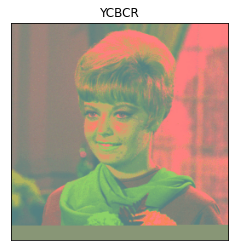

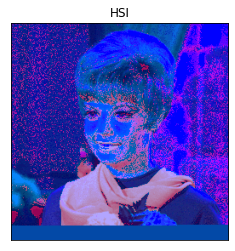

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


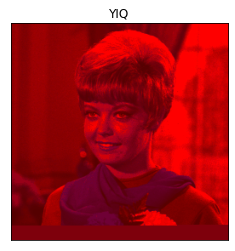

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


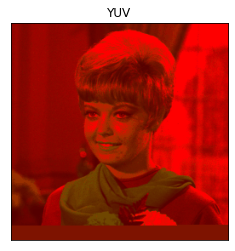

In [14]:
import cv2
import numpy as np
from skimage import color
from skimage import data
from skimage import io
from skimage import color
from skimage import data
from pylab import *
from google.colab.patches import cv2_imshow


img = cv2.imread('girl-warna.bmp', 1)

ycrcb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
hsi =  cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

cv2.imwrite('ycrcb.png', ycrcb)
cv2.imwrite('hsi.png', hsi)



#YCRCB
# cv2_imshow(ycrcb)
plt.imshow(ycrcb)
plt.title('YCBCR'), plt.xticks([]), plt.yticks([])
plt.show()

#HSI
# cv2_imshow(hsi)
plt.imshow(hsi)
plt.title('HSI'), plt.xticks([]), plt.yticks([])
plt.show()

#YIQ
img_yiq=color.rgb2yiq(img)
img_rgb=color.yiq2rgb(img_yiq)
plt.imshow(img_yiq)
plt.title('YIQ'), plt.xticks([]), plt.yticks([])
plt.show()

#YUV
img_yuv = color.rgb2yuv(img)
img_rgb = color.yuv2rgb(img_yuv)
plt.imshow(img_yuv)
plt.title('YUV'), plt.xticks([]), plt.yticks([])
plt.show()


## 2. Tentukan nilai threshold dengan metode otsu dari citra montain.bmp dan tampilkan hasil threshold-nya

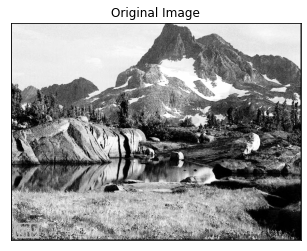

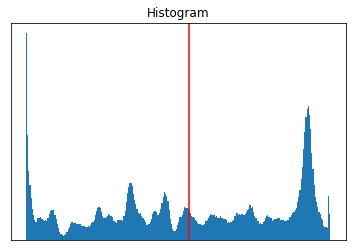

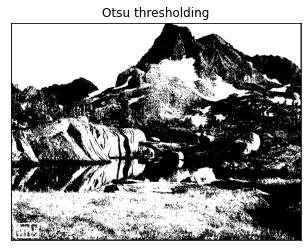

In [15]:
img = cv2.imread('mountain.bmp',0)

ret, imgf = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.show()

plt.hist(img.ravel(), 256)
plt.axvline(x=ret, color='r')
plt.title('Histogram'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(imgf,cmap = 'gray')
plt.title('Otsu thresholding'), plt.xticks([]), plt.yticks([])
plt.show()

## 3. Dengan menggunakan segmentasi dan proses citra biner, proses citra coints.png sehingga seluruh background menjadi hitam dan tidak terdapat bagian yang berlubang pada bagian koin dari citra tersebut

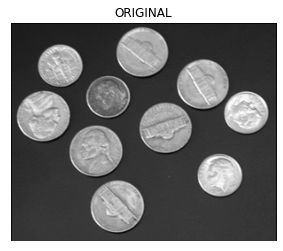

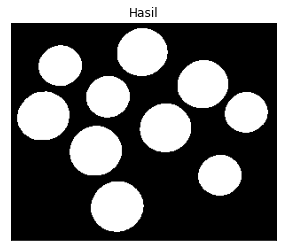

In [40]:
image1 = cv2.imread('coints.png')
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

blurG = cv2.GaussianBlur(img, (9, 9), 0)
edgeG = cv2.Canny(blurG, 100, 200)

h , w =edgeG.shape[:2]
mask = np.zeros((h+2, w+2), np.uint8)

imfloodfill= edgeG.copy()
cv2.floodFill(imfloodfill,mask,(0,0),255)
coinwhite = cv2.bitwise_not(imfloodfill)

plt.imshow(img,cmap = 'gray')
plt.title('ORIGINAL'), plt.xticks([]), plt.yticks([])
plt.show()

plt.imshow(coinwhite,cmap = 'gray')
plt.title('Hasil'), plt.xticks([]), plt.yticks([])
plt.show()

## 4. Segmentasi citra peppers.tiff menggunakan K-Mean dengan nilai K = 3 berdasarkan warna.

(Text(0.5, 1.0, 'Segmented image when K  = 3'),
 ([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

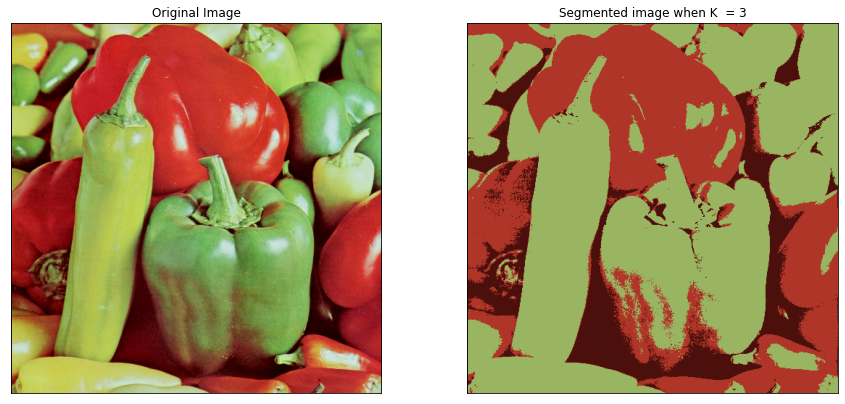

In [37]:
import numpy as np
import cv2 as cv
img = cv.imread('peppers.tiff')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
Z = img.reshape((-1,3))

Z = np.float32(Z)

criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))


figure_size = 15
plt.figure(figsize=(figure_size, figure_size))

plt.subplot(2,2,1), plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

plt.subplot(2,2,2), plt.imshow(res2)
plt.title('Segmented image when K  = 3'), plt.xticks([]), plt.yticks([])
